In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#add the data to notebook directory
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [3]:
#Data reading
df_tipo=pd.read_csv(parentdir+"\\Log of analysis of time aspects.csv",index_col=0)
df_tipo

,case:id,case:concept:name,concept:name,Variant,time:timestamp,Question,Report,Year,Category,Type,Tupla,Organization
0,A2 P4 BPI 2020,A2 P4 BPI 2020,Filter activities,Filter activities by sub-processes,2022-03-11 19:24:15.966942,P4,A2,2020,Student,Manipulation,A22020,"Faculty of Science, Utrecht University"
1,A2 P4 BPI 2020,A2 P4 BPI 2020,Group activities,Group activities by sub-processes,2022-03-11 20:24:15.966942,P4,A2,2020,Student,Manipulation,A22020,"Faculty of Science, Utrecht University"
2,A2 P4 BPI 2020,A2 P4 BPI 2020,Calculate cycle time,Calculate cycle time for all pairs of events f...,2022-03-11 21:24:15.966942,P4,A2,2020,Student,Analyze Time,A22020,"Faculty of Science, Utrecht University"
3,A7 P4 BPI 2020,A7 P4 BPI 2020,Group activities,Group activities by role,2022-03-11 22:24:15.966942,P4,A7,2020,Academic,Manipulation,A72020,German Research Center for Artificial Intellig...
4,A7 P4 BPI 2020,A7 P4 BPI 2020,Calculate throughput,Calculate throughput,2022-03-11 23:24:15.966942,P4,A7,2020,Academic,Analyze Time,A72020,German Research Center for Artificial Intellig...
...,...,...,...,...,...,...,...,...,...,...,...,...
950,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Group traces,Group traces by activities,2022-04-20 09:24:15.966942,P1-P2,A19,2020,Professional,Manipulation,A192020,Sberbank
951,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Calculate statistics,Calculate Statistics of activities,2022-04-20 10:24:15.966942,P1-P2,A19,2020,Professional,Calculate statistics,A192020,Sberbank
952,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Calculate throughput,Calculate throughput,2022-04-20 11:24:15.966942,P1-P2,A19,2020,Professional,Analyze Time,A192020,Sberbank
953,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Represent temporal series,Represent temporal series of throughput,2022-04-20 12:24:15.966942,P1-P2,A19,2020,Professional,Representation,A192020,Sberbank


In [4]:
#Number of different operations
len(df_tipo['concept:name'].unique())

56

In [7]:
#Number of different variants
len(df_tipo['Variant'].unique())

137

In [4]:
#Operations grouped by type:
df_tipo.groupby(['Type'])['concept:name'].value_counts()

Type                  concept:name                                                     
Analyze Time          Calculate cycle time                                                 152
                      Find bottlenecks                                                      63
                      Compare cycle time                                                    30
                      Calculate waiting time                                                27
                      Calculate throughput                                                  18
                      Calculate processing time                                             10
                      Comparative of throughput                                              2
                      Compare waiting time with processing time                              2
                      Analyze cycle time depending on the events                             1
                      Calculate intervals of time of the 

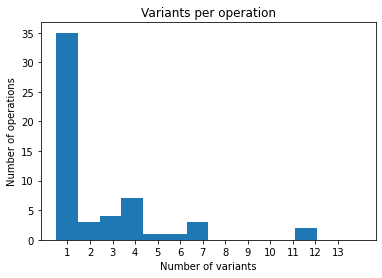

In [17]:
#histogram of number of variants per operation
v = df_tipo.groupby(by=['concept:name'])#group by operation
variantes = v.apply(lambda x: len(x["Variant"].unique())) #count the number of variants of each operation
fig, ax = plt.subplots()
plt.title('Variants per operation')
plt.xlabel('Number of variants')
plt.ylabel('Number of operations')
plt.xticks(np.arange(1, 14, 1.0))
plt.hist(variantes, 14, range=[0.5, 14])
plt.show()

In [23]:
#Operations with the highest number of variants
variantes.sort_values(ascending=False)[0:5]

concept:name
Calculate cycle time            12
Group traces                    12
Calculate frequency              7
Calculate number of elements     7
Filter traces                    7
dtype: int64

In [14]:
#Average frequency of the operations
df_freq_op=df_tipo['concept:name'].value_counts()
avg_frec=df_freq_op.mean()
avg_frec

17.053571428571427

In [15]:
#Operations with a frequency higher than the average
df_freq_op[df_freq_op>avg_frec]

Calculate cycle time            152
Filter traces                    86
Calculate number of elements     76
Find bottlenecks                 63
Group traces                     58
Calculate percentages            55
Represent process map            47
Represent bar charts             36
Calculate statistics             36
Identify attributes              34
Represent histograms             32
Compare cycle time               30
Calculate waiting time           27
Represent temporal series        25
Calculate frequency              25
Calculate throughput             18
Name: concept:name, dtype: int64